## Optionlib testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import optionlib as opt

#### Black-Scholes Options

In [4]:
bs_call = opt.BSOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04, type='C')
bs_call

+1 BSOption(s=100, k=110, t=0.31746031746031744, sigma=0.3, r=0.04, type=C)

In [5]:
bs_call.summary()

parameters          characteristics / greeks          
                                                        
0          S      100                    price  3.531957
1          K      110                    delta  0.342487
2         IV      0.3                    gamma  0.021737
3          t  0.31746                     vega  0.207022
4          r     0.04                    theta -0.030165
5                                          rho  0.097489

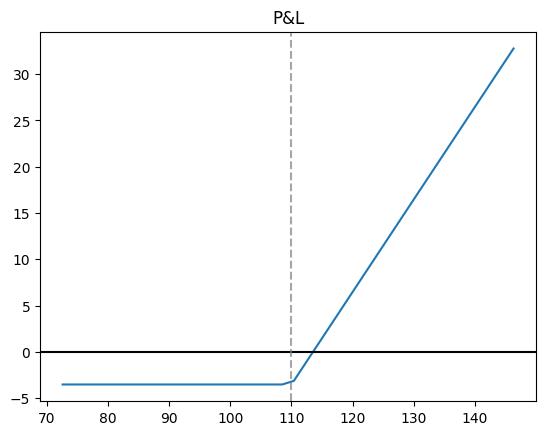

In [7]:
bs_call.plot('pnl')

In [9]:
bs_call.plot('delta',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.001), FloatSlider(val…

#### Binomial Tree Options

In [11]:
put = opt.BinomialOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='put',style='A',n=100)
put

+1 BinomialOption(s=100, k=110, t=0.31746031746031744, sigma=0.3, r=0.04, type=P, style=A)

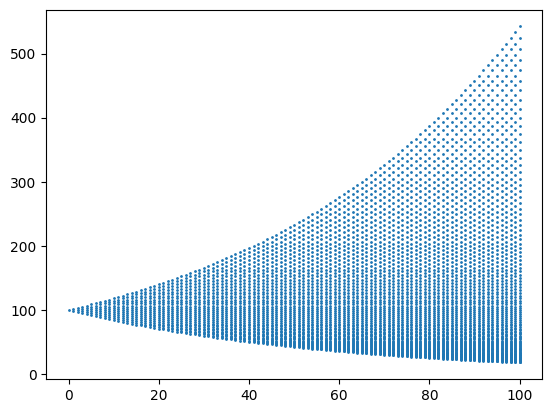

In [12]:
put.show_tree()

In [13]:
put.summary()

greeks            parameters           
                                         
0  price  12.436578          S  100.00000
1  delta  -0.680002          K  110.00000
2  gamma   0.024425         IV    0.30000
3   vega   0.409688          t    0.31746
4                            r    0.04000

In [14]:
put.value(n=500)

12.435704996509255

#### Option Combinations

##### Basic Combinations

In [15]:
s = 100
call = opt.BSOption(s=s,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
put = opt.BSOption(s=s,k=90,sigma=0.3,t='03-17-2023',r=0.04,type='put')
portfolio = put - call
portfolio

OptionPortfolio(
+1 BSOption(s=100, k=90, t=0.31746031746031744, sigma=0.3, r=0.04, type=P)
-1 BSOption(s=100, k=100, t=0.31746031746031744, sigma=0.3, r=0.04, type=C)
)

In [16]:
portfolio.summary()

parameters                         characteristics / greeks          
             Leg 1 (+1P) Leg 2 (-1C)                                   
0      price    2.283999   -7.330465               total cost -5.046466
1          S  100.000000  100.000000                    delta -0.780096
2          K   90.000000  100.000000                    gamma -0.005917
3         IV    0.300000    0.300000                     vega -0.056356
4          t    0.317460    0.317460                    theta  0.015289
5          r    0.040000    0.040000                      rho -0.231572

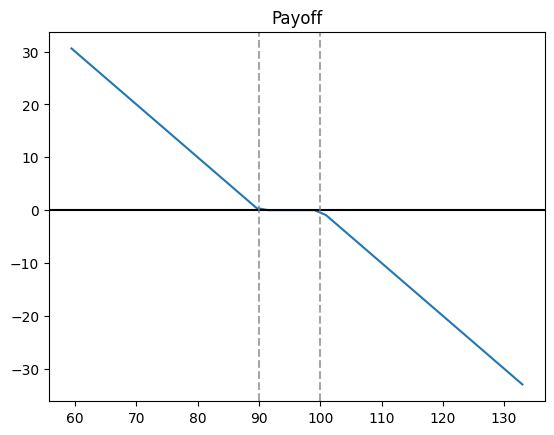

In [17]:
portfolio.plot('payoff')

In [18]:
portfolio.plot('gamma',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.001), Output(layout=L…

##### Some more advanced operations

In [20]:
s = 100
call1 = opt.BSOption(s=s,k=90,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call2 = opt.BSOption(s=s,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call3 = opt.BSOption(s=s,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='call')

In [21]:
portfolio = call1 - (call2*2) + call3
portfolio

OptionPortfolio(
+1 BSOption(s=100, k=90, t=0.31746031746031744, sigma=0.3, r=0.04, type=C)
-2 BSOption(s=100, k=100, t=0.31746031746031744, sigma=0.3, r=0.04, type=C)
+1 BSOption(s=100, k=110, t=0.31746031746031744, sigma=0.3, r=0.04, type=C)
)

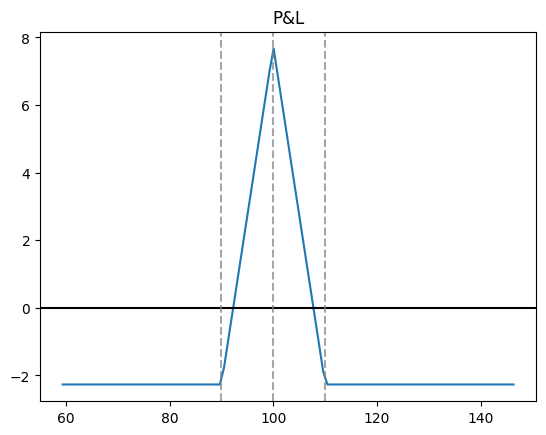

In [26]:
portfolio.plot('pnl',resolution=110)

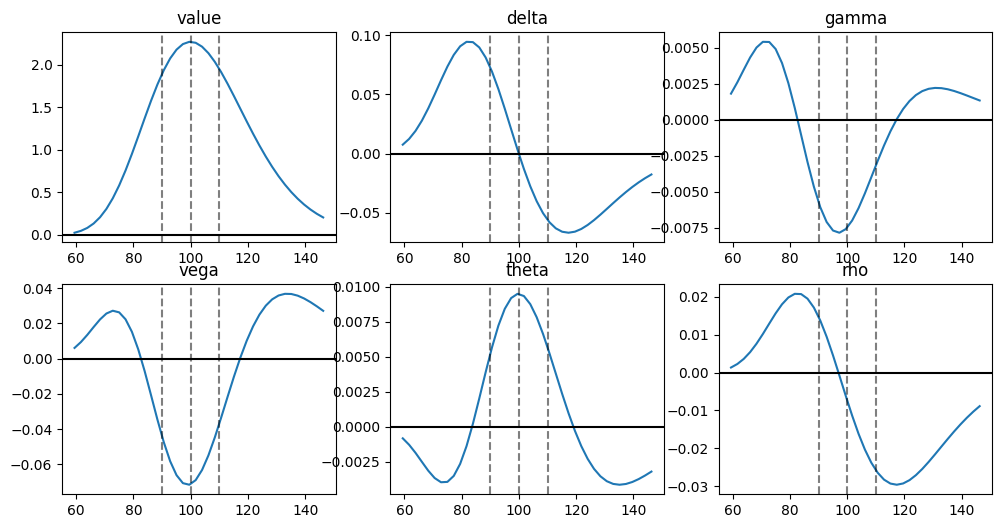

In [28]:
portfolio.plot('summary')

In [27]:
portfolio.plot('vega',resolution=50,interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.001), Output(layout=L…

### Volatility Surface

In [67]:
spy_surf = opt.VolSurface('SPY',moneyness=True) # Moneyness makes strikes in terms of percent ITM or OTM rather than dollar value

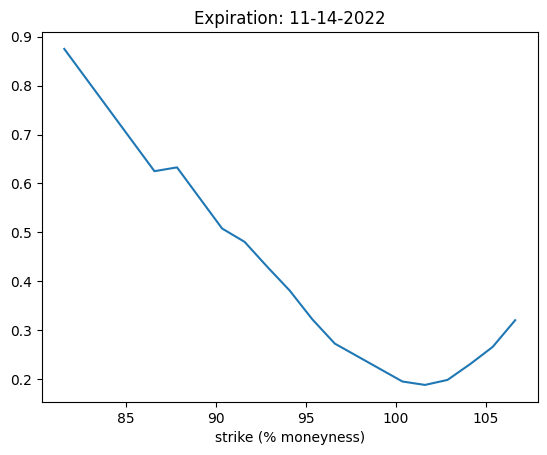

In [70]:
spy_surf.skew_plot() # The first call makes it download the data. Usually takes under a minute

In [71]:
spy_surf.surface_plot()

In [73]:
spy_surf.surface_table.query('strike > 80 & strike < 120')

date,2022-11-14,2022-11-16,2022-11-18,2022-11-21,2022-11-23,2022-11-25,2022-11-28,2022-11-30,2022-12-12,2022-12-14,...,2023-04-21,2023-06-16,2023-06-30,2023-09-15,2023-09-29,2023-12-15,2024-01-19,2024-06-21,2024-12-20,2025-01-17
strike,,,,,,,,,,,,,,,,,,,,,
81.553788,0.875001,0.679691,0.582035,0.484380,0.460943,0.423834,0.390631,0.380866,0.334968,0.340583,...,0.293861,0.286201,0.284721,0.277961,0.280616,0.270027,0.270103,0.268303,0.254585,0.255638
82.808462,0.812502,0.632816,0.539067,0.464849,0.429693,0.404303,0.371100,0.360358,0.321540,0.329841,...,0.288002,0.281105,0.280036,0.273430,0.276008,0.265861,0.280220,0.263710,0.241692,0.251045
84.063135,0.750003,0.585942,0.519536,0.441412,0.408209,0.381842,0.349616,0.343757,0.309577,0.320563,...,0.282417,0.276069,0.275001,0.268837,0.271461,0.261589,0.275352,0.262016,0.248009,0.246269
85.317809,0.687503,0.566411,0.486333,0.408209,0.383795,0.359381,0.333014,0.328620,0.298347,0.308601,...,0.276954,0.270912,0.270088,0.264381,0.266929,0.257591,0.251686,0.256851,0.245674,0.243912
86.572482,0.625004,0.519536,0.457037,0.389655,0.363288,0.338874,0.313483,0.310554,0.286994,0.299690,...,0.271644,0.266121,0.265327,0.259956,0.262382,0.253349,0.264595,0.254433,0.243042,0.241264
87.827156,0.632816,0.498052,0.434576,0.361335,0.340827,0.321296,0.295417,0.293220,0.275642,0.288948,...,0.266426,0.261421,0.260429,0.255409,0.257896,0.249260,0.248863,0.248726,0.227509,0.230934
89.081830,0.570317,0.449224,0.399420,0.335944,0.319343,0.299812,0.279792,0.278816,0.265266,0.281379,...,0.261268,0.256630,0.255684,0.250938,0.253334,0.245125,0.259269,0.245644,0.234482,0.232758
90.336503,0.507817,0.412115,0.373053,0.315925,0.297370,0.282722,0.263679,0.264900,0.255745,0.272834,...,0.256233,0.251793,0.250908,0.246422,0.248833,0.240913,0.249306,0.242210,0.231087,0.219849
91.591177,0.480474,0.384772,0.345710,0.290534,0.280036,0.264412,0.249275,0.251716,0.246345,0.265632,...,0.251106,0.247063,0.246162,0.241920,0.244209,0.236778,0.248802,0.238426,0.227425,0.225731
